Hàm này sẽ chuyển đổi các đặc trưng bằng cách scale mỗi đặc trưng sử dụng thống kê, loại bỏ ngoại lai.

Sau khi chuẩn hóa với RobustScaler, chúng ta có thể áp dụng thêm StandardScaler hoặc MinMaxScaler cho quá trình tiền xử lý dữ liệu.

Bộ chuẩn hóa này loại bỏ trung vị và chia tỷ lệ dữ liệu thành các phần tư (mặc định là IQR: Interquartile Range). IQR là phạm vi giữa phần tư thứ nhất (25%) và phần tư thứ ba (75%).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,54.135914,17.310551,6.399715,-5.645539,22.018523
1,58.075768,0.082880,8.560631,-1.503742,17.907892
2,53.650665,19.292481,14.814058,-5.928844,15.834230
3,55.786891,9.226510,14.330865,20.339290,19.910628
4,42.156120,5.676636,12.385610,14.981923,20.836118


<AxesSubplot:ylabel='Density'>

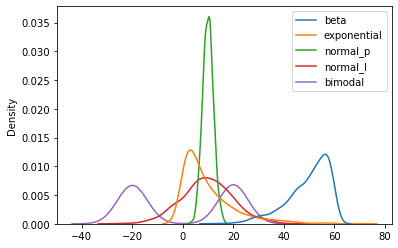

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.726972,9.933490,10.044873,9.778653,0.106765
std,8.433826,10.356755,2.132260,10.102067,20.203167
min,13.093554,0.008562,3.285923,-25.853609,-28.508893
25%,45.178484,2.480470,8.588509,3.448731,-19.711706
50%,51.946326,6.528094,10.072221,9.606545,1.593909
75%,56.418350,13.902735,11.380049,16.405377,20.158649
max,59.997455,68.929634,16.778456,44.290293,28.234620


<AxesSubplot:ylabel='Density'>

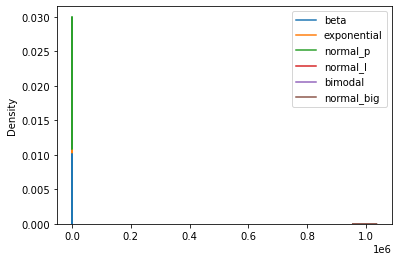

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

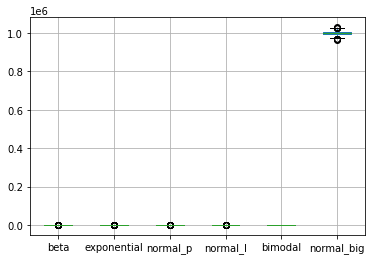

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.194806,0.943986,-1.315584,-1.177163,0.512276,-0.278530
1,0.545331,-0.564268,-0.541490,-0.857497,0.409176,-0.681037
2,0.151633,1.117501,1.698645,-1.199029,0.357166,0.417751
3,0.341691,0.236242,1.525553,0.828358,0.459407,0.234606
4,-0.871025,-0.074544,0.828714,0.414874,0.482619,-0.314250


<AxesSubplot:ylabel='Density'>

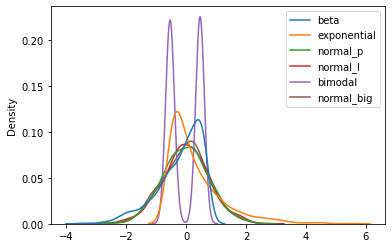

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,-0.197454,0.298137,-0.009797,1.328340e-02,-0.037299,-0.035169
std,0.750349,0.906716,0.763829,7.796822e-01,0.506722,0.776104
min,-3.456694,-0.570774,-2.431023,-2.736831e+00,-0.755017,-2.737490
25%,-0.602128,-0.354363,-0.531503,-4.752630e-01,-0.534372,-0.538122
50%,0.000000,0.000000,0.000000,-6.852158e-17,0.000000,0.000000
75%,0.397872,0.645637,0.468497,5.247370e-01,0.465628,0.461878
max,0.716301,5.463150,2.402342,2.676908e+00,0.668183,2.266179


<AxesSubplot:>

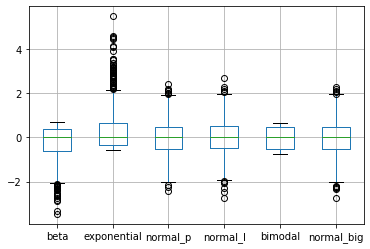

In [14]:
df_s.boxplot()

In [15]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.456693635570888,
 -0.5707739691689822,
 -2.4310226293897683,
 -2.7368312143524007,
 -0.7550171284728894,
 -2.7374898591558243]

In [16]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.7163012084741845,
 5.463149758128364,
 2.4023418354525945,
 2.676907824843601,
 0.6681834409559473,
 2.266179146847557]

In [17]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([5.19463260e+01, 6.52809351e+00, 1.00722213e+01, 9.60654504e+00,
       1.59390860e+00, 9.99824755e+05])